In [4]:
%load_ext autoreload

%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [27]:
import f1lib
import fastf1

In [28]:
dir(f1lib)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__']

AttributeError: module 'f1lib' has no attribute 'setup_mpl'

In [20]:
dir(src.src.src)

['__builtins__',
 '__cached__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'src']

In [ ]:
fastest_laps.png

In [6]:
import fastf1
fastf1.plotting.TEAM_COLORS

AttributeError: module 'fastf1' has no attribute 'plotting'

In [645]:
import fastf1
import pandas as pd
import fastf1.plotting
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib import cm
import numpy as np


fastf1.Cache.enable_cache('./cache')  # replace with your cache directory

session = fastf1.get_session(2021, 'Russian Grand Prix', 'Q')
laps = session.load_laps(with_telemetry=True)

lap = laps.pick_fastest()
tel = lap.get_telemetry()

core           INFO 	Loading laps for Russian Grand Prix - Qualifying [v2.1.8]
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
core           INFO 	Loaded data for 20 drivers: ['5', '4', '11', '33', '47', '55', '3', '77', '14', '10', '22', '31', '44', '16', '9', '63', '18', '6', '7', '99']


In [288]:
laptimes = (laps
    .assign(LapTimeSeconds=lambda df: [i.seconds for i in df["LapTime"]])
    .assign(DeltaFromMean=lambda df: df['LapTimeSeconds'].median() - df["LapTimeSeconds"])
    .groupby(['LapNumber', "Driver"], as_index=False)["DeltaFromMean"]
    .agg(('first')).pivot(columns="Driver", index="LapNumber", values="DeltaFromMean"))

In [166]:
laps.LapTime.mean().seconds

104

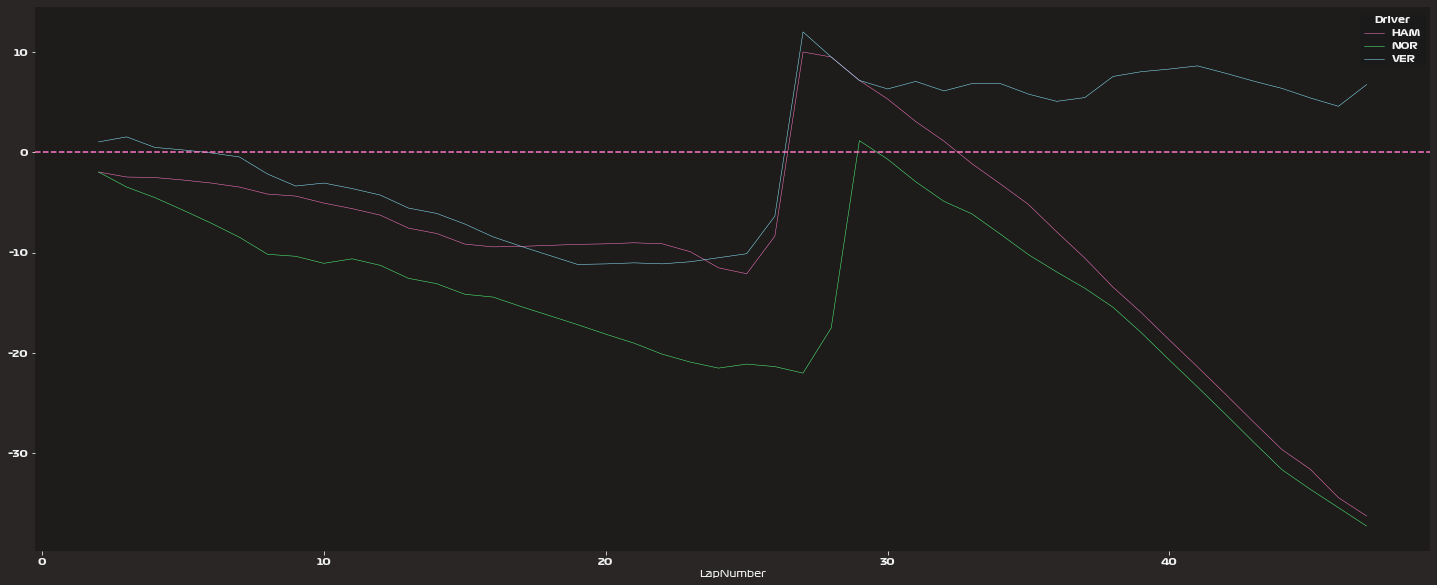

In [451]:
laptimes[['HAM','NOR', 'VER']].plot(figsize=(25,10), lw=0.5)
plt.axhline(0, ls="--")


In [646]:
def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw={}, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Parameters
    ----------
    data
        A 2D numpy array of shape (N, M).
    row_labels
        A list or array of length N with the labels for the rows.
    col_labels
        A list or array of length M with the labels for the columns.
    ax
        A `matplotlib.axes.Axes` instance to which the heatmap is plotted.  If
        not provided, use current axes or create a new one.  Optional.
    cbar_kw
        A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
    cbarlabel
        The label for the colorbar.  Optional.
    **kwargs
        All other arguments are forwarded to `imshow`.
    """

    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=False, bottom=False,
                   labeltop=True, labelbottom=True)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=0, ha="center",
             rotation_mode="anchor")

    # Turn spines off and create white grid.
    ax.spines[:].set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", axis="x", color="black", linestyle='--', linewidth=1)
    ax.grid(which="minor", axis="y", color="black", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", top=False, left=False)

    return im


In [647]:
from mpl_toolkits import axes_grid1

def add_colorbar(im, aspect=20, pad_fraction=0.5, **kwargs):
    """Add a vertical color bar to an image plot."""
    divider = axes_grid1.make_axes_locatable(im.axes)
    width = axes_grid1.axes_size.AxesY(im.axes, aspect=1./aspect)
    pad = axes_grid1.axes_size.Fraction(pad_fraction, width)
    current_ax = plt.gca()
    cax = divider.append_axes("right", size=width, pad=pad)
    plt.sca(current_ax)
    return im.axes.figure.colorbar(im, cax=cax, **kwargs)

In [1]:
import fastf1

fastf1.plotting.setup_mpl(
    mpl_timedelta_support=True, 
    color_scheme=None, 
    misc_mpl_mods=False)
fig, ax = plt.subplots(figsize=(25,10))

# laptimes.plot(lw=0.5, ax=top)
# top.axhline(0, ls="--")

im = heatmap(
    laptimes.fillna(method='bfill').T.values, 
    laptimes.T.index, 
    laptimes.T.columns, 
    ax=ax,
    interpolation="antialiased",
    cmap="bwr_r")
add_colorbar(im)
plt.title("Difference from the Mean")
plt.tight_layout()
plt.show()

AttributeError: module 'fastf1' has no attribute 'plotting'

In [573]:
df.groupby('Driver')['LapTimeSeconds'].sum().sort_values()

Driver
MSC    3327
LAT    4839
HAM    5416
VET    5417
MAZ    5431
GAS    5453
OCO    5460
VER    5468
LEC    5474
SAI    5477
RIC    5482
BOT    5483
ALO    5498
NOR    5498
GIO    5499
RAI    5502
PER    5506
RUS    5514
TSU    5516
STR    5523
dtype: int64

In [555]:
df = (
    fastf1
    .get_session(2021, 'Russian GP', 'R')
    .load_laps(with_telemetry=True)
    .assign(LapTimeNorm=lambda df: df.apply(lambda row: row['Time'] - row["LapStartTime"], axis=1))
    .assign(LapTimeSeconds=lambda df: [i.seconds for i in df["LapTimeNorm"]])
)
# ref = (
#     df[(df.LapTimeSeconds >= df.LapTimeSeconds.min()) & (df.LapTimeSeconds <= (df.LapTimeSeconds.min() + df.LapTimeSeconds.min()*0.1))]
#     .groupby('LapNumber')["LapTimeSeconds"].mean().cumsum())
ref = (
    df.groupby('LapNumber')["LapTimeSeconds"]
    .apply(
        lambda series: series[(series >= series.min()) & (series <= (series.min() + series.min()*0.1))].mean())).cumsum()
good_times = (
    df
    .groupby('LapNumber')['LapTimeSeconds']
    .apply(lambda df: df[(df > df.min()) & (df < (df.min() + (df.min()/10)))].mean())
    .T
)
laptimes = (
    df
    .groupby(['LapNumber', "Driver"], as_index=False)["LapTimeSeconds"]
    .agg(('first'))
    .pivot(columns="Driver", index="LapNumber", values="LapTimeSeconds")
    .fillna(method='pad')
    .cumsum()
    .apply(lambda row: (row - ref), axis=0)
)

core        WARNING 	Ergast API lookup failed. The session is very recent and not yet available or does not exist.
core           INFO 	Loading laps for Russian Grand Prix - Race [v2.1.8]
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
core           INFO 	Loaded data for 20 drivers: ['5', '4', '11', '33', '47', '55', '3', '77', '14', '10', '22', '31', '44', '16', '9', '63', '18', '6', '7', '99']


In [554]:
df.apply(lambda row: row['Time'] - row["LapStartTime"], axis=1)

0   0 days 00:01:44.480000
1   0 days 00:01:42.204000
2   0 days 00:01:41.697000
dtype: timedelta64[ns]

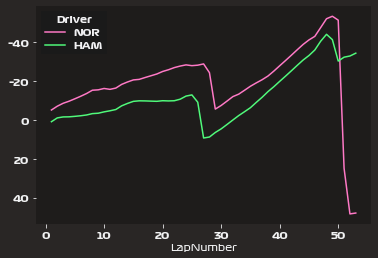

In [556]:
laptimes[['NOR','HAM']].plot()
plt.gca().invert_yaxis()

In [600]:
fig, ax = plt.subplots(figsize=(25,10), dpi=600)

# laptimes.plot(lw=0.5, ax=top)
# top.axhline(0, ls="--")

im = heatmap(
    laptimes.fillna(method='bfill').T.values, 
    laptimes.T.index, 
    laptimes.T.columns, 
    ax=ax,
    cmap="PRGn_r",
    interpolation="antialiased"
)
add_colorbar(im)
plt.title("Cummulative Gap from To Reference")
# plt.subtitle("Reference = mean of: all lap times within best lap + 10% accumulated over laps")
plt.tight_layout()
plt.show()

In [560]:
from matplotlib.ticker import MaxNLocator

In [587]:
driver_meta = pd.read_csv("driver_data_from_f1.com.2021.10.03.w_codes.csv")

In [595]:
driver_kw = dict(zip(drivers, [driver_meta.loc[driver_meta['driver_code'] == d, 'team'].values[0] for d in drivers]))

In [596]:
driver_kw

{'NOR': 'McLaren',
 'SAI': 'Ferrari',
 'RUS': 'Williams',
 'HAM': 'Mercedes',
 'RIC': 'McLaren',
 'ALO': 'Alpine',
 'STR': 'Aston Martin',
 'PER': 'Red Bull Racing',
 'OCO': 'Alpine',
 'VET': 'Aston Martin',
 'GAS': 'AlphaTauri',
 'TSU': 'AlphaTauri',
 'RAI': 'Alfa Romeo Racing',
 'MSC': 'Haas F1 Team',
 'MAZ': 'Haas F1 Team',
 'BOT': 'Mercedes',
 'GIO': 'Alfa Romeo Racing',
 'LAT': 'Williams',
 'LEC': 'Ferrari',
 'VER': 'Red Bull Racing'}

In [588]:
driver_meta

,link,rank,points,first_name,second_name,flag_uri,team,driver_image_uri,driver_number_uri,driver_number,driver_code
0,/en/drivers/lewis-hamilton.html,1,246.5,Lewis,Hamilton,https://www.formula1.com/content/dam/fom-websi...,Mercedes,https://www.formula1.com/content/dam/fom-websi...,https://www.formula1.com/content/dam/fom-websi...,44,HAM
1,/en/drivers/max-verstappen.html,2,244.5,Max,Verstappen,https://www.formula1.com/content/dam/fom-websi...,Red Bull Racing,https://www.formula1.com/content/dam/fom-websi...,https://www.formula1.com/content/dam/fom-websi...,33,VER
2,/en/drivers/valtteri-bottas.html,3,151.0,Valtteri,Bottas,https://www.formula1.com/content/dam/fom-websi...,Mercedes,https://www.formula1.com/content/dam/fom-websi...,https://www.formula1.com/content/dam/fom-websi...,77,BOT
3,/en/drivers/lando-norris.html,4,139.0,Lando,Norris,https://www.formula1.com/content/dam/fom-websi...,McLaren,https://www.formula1.com/content/dam/fom-websi...,https://www.formula1.com/content/dam/fom-websi...,4,NOR
4,/en/drivers/sergio-perez.html,5,120.0,Sergio,Perez,https://www.formula1.com/content/dam/fom-websi...,Red Bull Racing,https://www.formula1.com/content/dam/fom-websi...,https://www.formula1.com/content/dam/fom-websi...,11,PER
5,/en/drivers/carlos-sainz.html,6,112.5,Carlos,Sainz,https://www.formula1.com/content/dam/fom-websi...,Ferrari,https://www.formula1.com/content/dam/fom-websi...,https://www.formula1.com/content/dam/fom-websi...,55,SAI
6,/en/drivers/charles-leclerc.html,7,104.0,Charles,Leclerc,https://www.formula1.com/content/dam/fom-websi...,Ferrari,https://www.formula1.com/content/dam/fom-websi...,https://www.formula1.com/content/dam/fom-websi...,16,LEC
7,/en/drivers/daniel-ricciardo.html,8,95.0,Daniel,Ricciardo,https://www.formula1.com/content/dam/fom-websi...,McLaren,https://www.formula1.com/content/dam/fom-websi...,https://www.formula1.com/content/dam/fom-websi...,3,RIC
8,/en/drivers/pierre-gasly.html,9,66.0,Pierre,Gasly,https://www.formula1.com/content/dam/fom-websi...,AlphaTauri,https://www.formula1.com/content/dam/fom-websi...,https://www.formula1.com/content/dam/fom-websi...,10,GAS
9,/en/drivers/fernando-alonso.html,10,58.0,Fernando,Alonso,https://www.formula1.com/content/dam/fom-websi...,Alpine,https://www.formula1.com/content/dam/fom-websi...,https://www.formula1.com/content/dam/fom-websi...,14,ALO


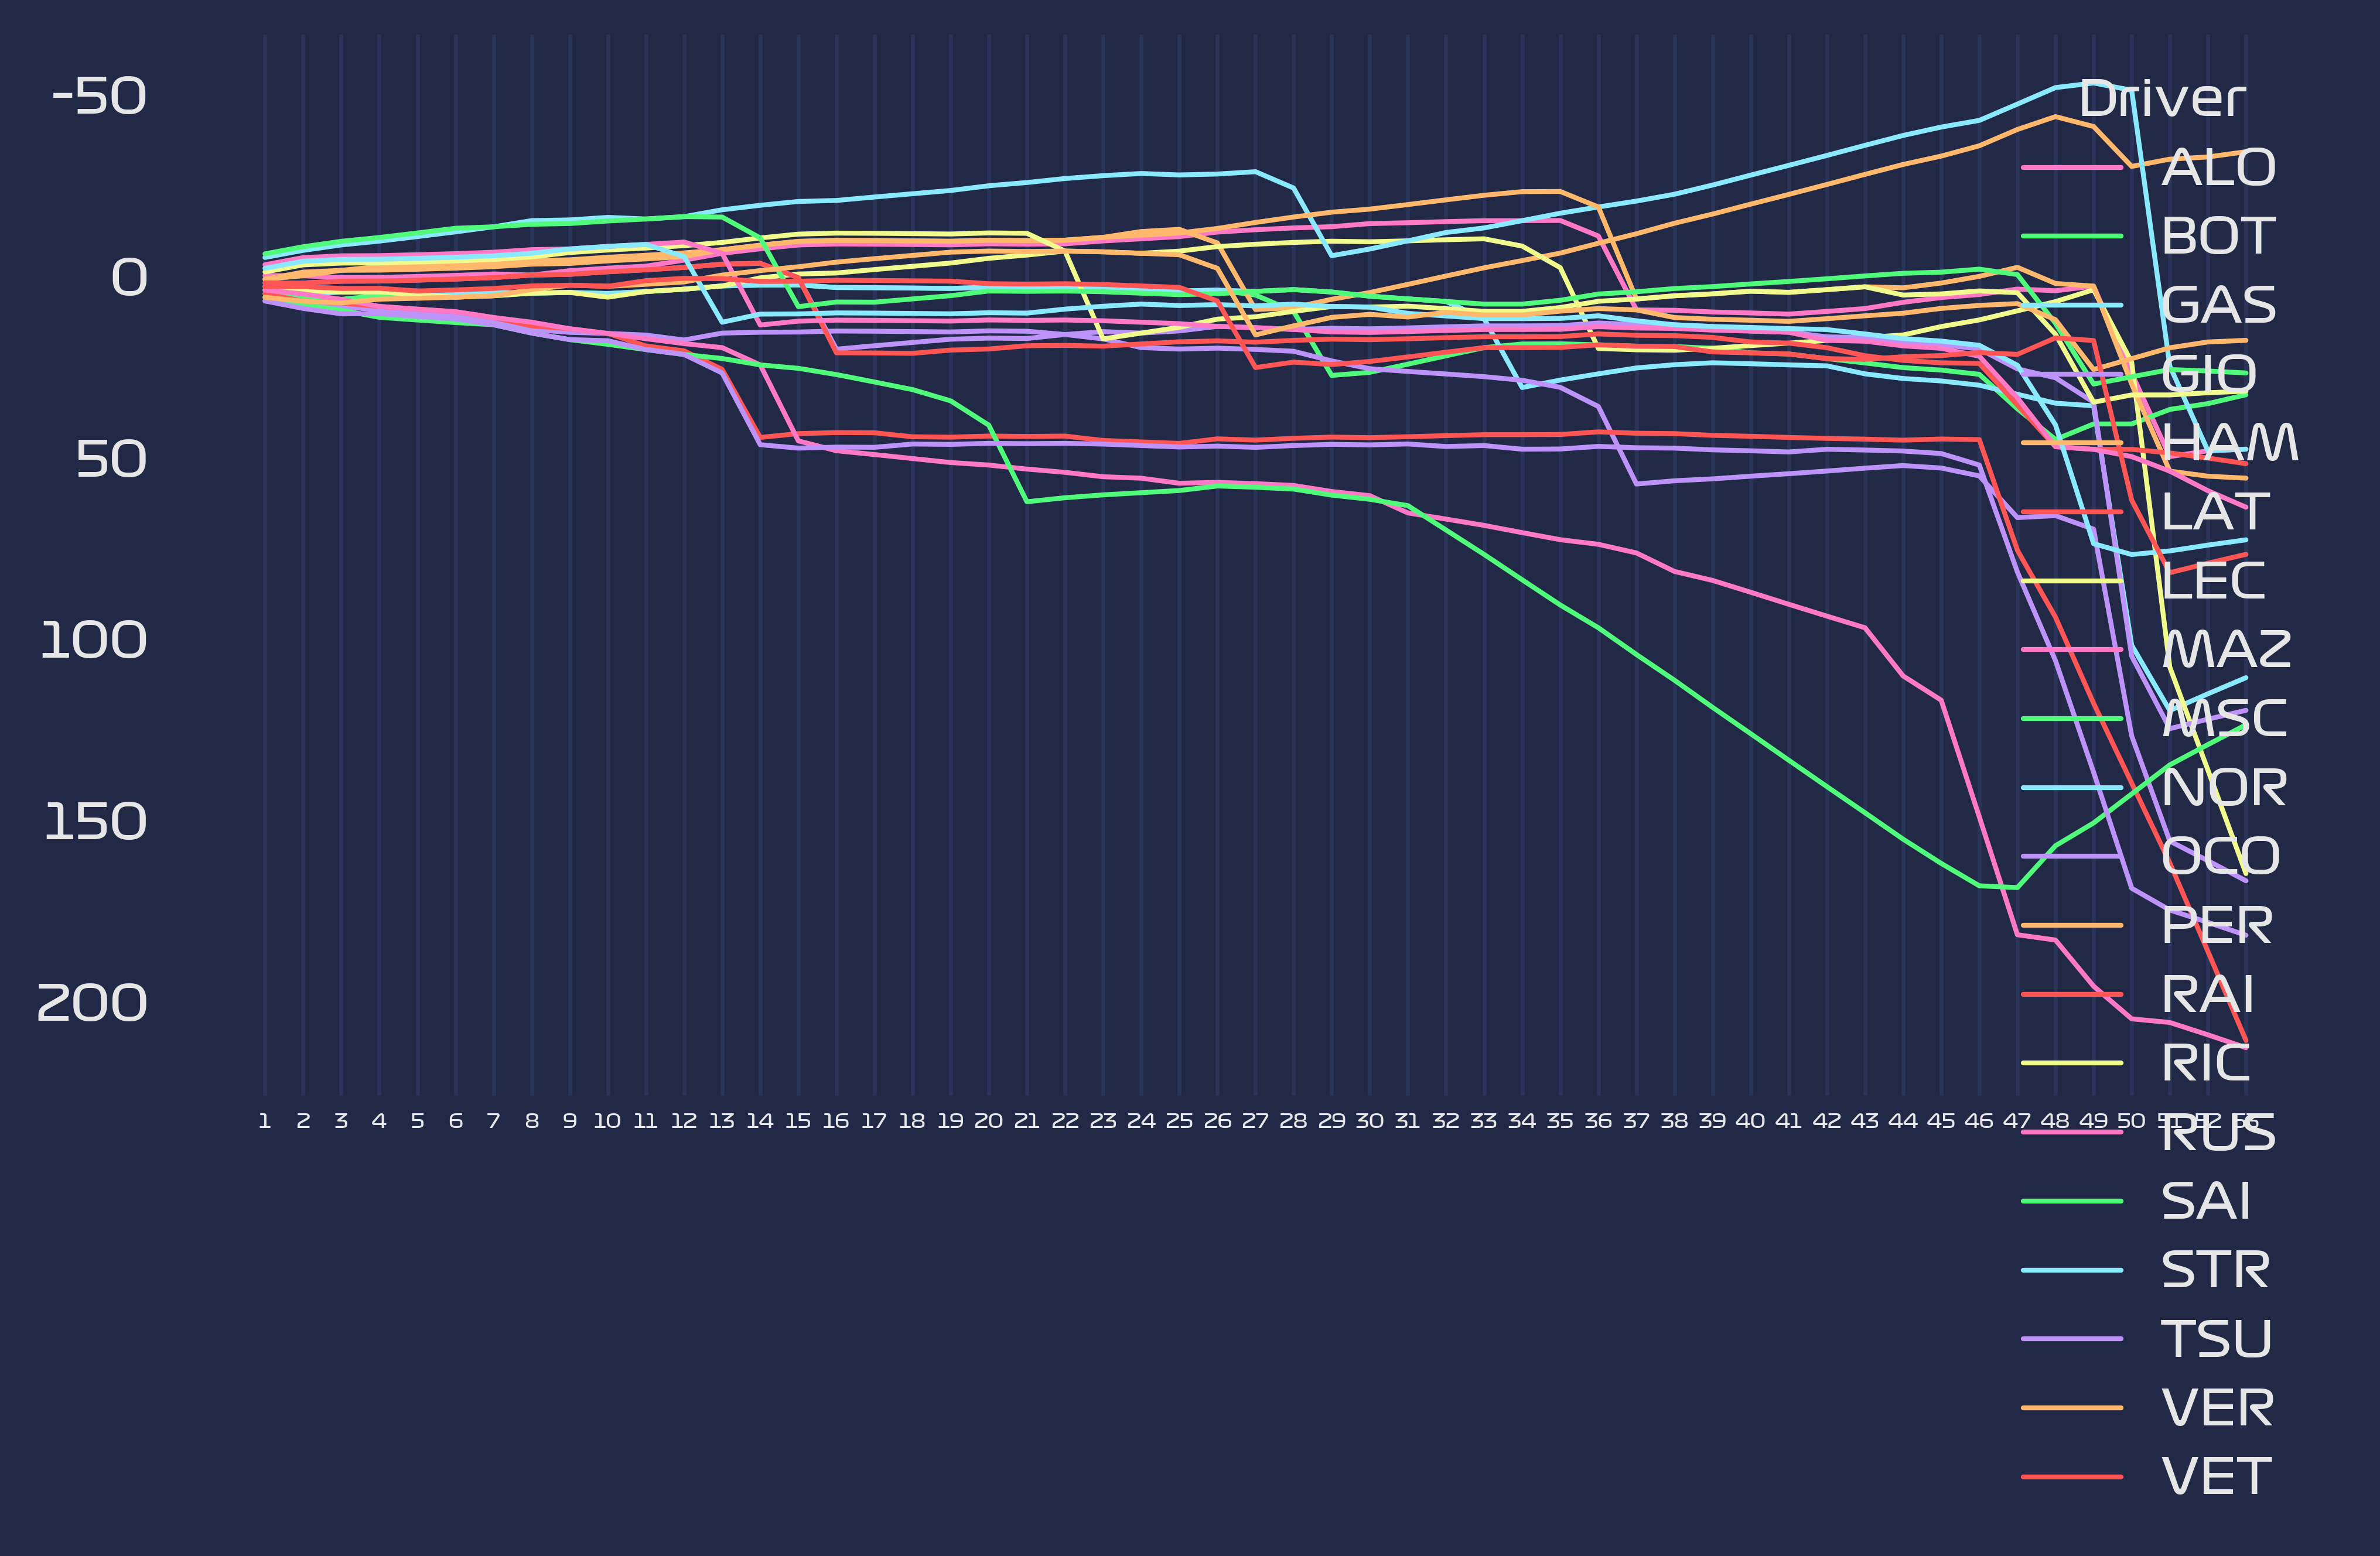

In [626]:
from typing import Tuple, Optional

def get_rows_for_fixed_columns(n, c:int=4)->Tuple[int,int]:
    """
    Given a number of items and a number of 
    columns to layout the items across, return 
    the number of rows and the padding required to make an M * N layout.
    
    """
    number_of_rows = n // c
    
    if n%c > 0:
        number_of_padding_columns_on_last_row = c - (n % 4) 
        return (number_of_rows, number_of_padding_columns_on_last_row)
    return (number_of_rows, 0)

In [75]:
drivers = ["RIC", "NOR"]
columns= 2
rows, padding = get_rows_for_fixed_columns(n=len(drivers), c=columns)

cells = list(drivers) + (np.repeat(".", padding) if padding > 0 else [])
cells_laid_out = np.concatenate([
    np.tile("title", (1,columns)),
    np.array(cells).reshape(rows,columns), 
    np.tile("foot", (1, columns))])

In [5]:
from highlight_text import HighlightText, ax_text, fig_text

def annotate_axes(ax_dict, x=0.5, y=0.5, kw_dict={}):
    """
    Helper to identify the Axes in the examples below.
    Draws the label in a large font in the center of the Axes.
    
    SOURCE: https://matplotlib.org/stable/tutorials/provisional/mosaic.html

    Parameters
    ----------
    ax_dict : Dict[str, Axes]
        Mapping between the title / label and the Axes.

    fontsize : int, optional
        How big the label should be
    """
    kw = dict(ha="center", va="center", fontsize=8, color="darkgrey")
    kw.update(kw_dict)
    for text, ax in ax_dict.items():
        ax.text(x, y, text, transform=ax.transAxes, **kw)

In [6]:
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox
import PIL
import urllib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [48]:
def add_image(ax, image_path)->None:
    arr_lena = mpimg.imread(image_path)

    imagebox = OffsetImage(arr_lena, zoom=0.1)
    ab = AnnotationBbox(imagebox, (0.8, 0.35),xycoords=ax, frameon=False)
    ax.add_artist(ab)

In [8]:
dr_meta = pd.read_csv("./driver_data_from_f1.com.2021.10.03.w_codes.csv")
dr_meta = dr_meta.set_index("driver_code")

In [72]:
dr_meta

,link,rank,points,first_name,second_name,flag_uri,team,driver_image_uri,driver_number_uri,driver_number
driver_code,,,,,,,,,,
HAM,/en/drivers/lewis-hamilton.html,1,246.5,Lewis,Hamilton,https://www.formula1.com/content/dam/fom-websi...,Mercedes,https://www.formula1.com/content/dam/fom-websi...,https://www.formula1.com/content/dam/fom-websi...,44
VER,/en/drivers/max-verstappen.html,2,244.5,Max,Verstappen,https://www.formula1.com/content/dam/fom-websi...,Red Bull Racing,https://www.formula1.com/content/dam/fom-websi...,https://www.formula1.com/content/dam/fom-websi...,33
BOT,/en/drivers/valtteri-bottas.html,3,151.0,Valtteri,Bottas,https://www.formula1.com/content/dam/fom-websi...,Mercedes,https://www.formula1.com/content/dam/fom-websi...,https://www.formula1.com/content/dam/fom-websi...,77
NOR,/en/drivers/lando-norris.html,4,139.0,Lando,Norris,https://www.formula1.com/content/dam/fom-websi...,McLaren,https://www.formula1.com/content/dam/fom-websi...,https://www.formula1.com/content/dam/fom-websi...,4
PER,/en/drivers/sergio-perez.html,5,120.0,Sergio,Perez,https://www.formula1.com/content/dam/fom-websi...,Red Bull Racing,https://www.formula1.com/content/dam/fom-websi...,https://www.formula1.com/content/dam/fom-websi...,11
SAI,/en/drivers/carlos-sainz.html,6,112.5,Carlos,Sainz,https://www.formula1.com/content/dam/fom-websi...,Ferrari,https://www.formula1.com/content/dam/fom-websi...,https://www.formula1.com/content/dam/fom-websi...,55
LEC,/en/drivers/charles-leclerc.html,7,104.0,Charles,Leclerc,https://www.formula1.com/content/dam/fom-websi...,Ferrari,https://www.formula1.com/content/dam/fom-websi...,https://www.formula1.com/content/dam/fom-websi...,16
RIC,/en/drivers/daniel-ricciardo.html,8,95.0,Daniel,Ricciardo,https://www.formula1.com/content/dam/fom-websi...,McLaren,https://www.formula1.com/content/dam/fom-websi...,https://www.formula1.com/content/dam/fom-websi...,3
GAS,/en/drivers/pierre-gasly.html,9,66.0,Pierre,Gasly,https://www.formula1.com/content/dam/fom-websi...,AlphaTauri,https://www.formula1.com/content/dam/fom-websi...,https://www.formula1.com/content/dam/fom-websi...,10


KeyError: 'SAI'

/Users/martin/.local/share/virtualenvs/formula1-YPUJXkxS/lib/python3.8/site-packages/IPython/core/pylabtools.py:134: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


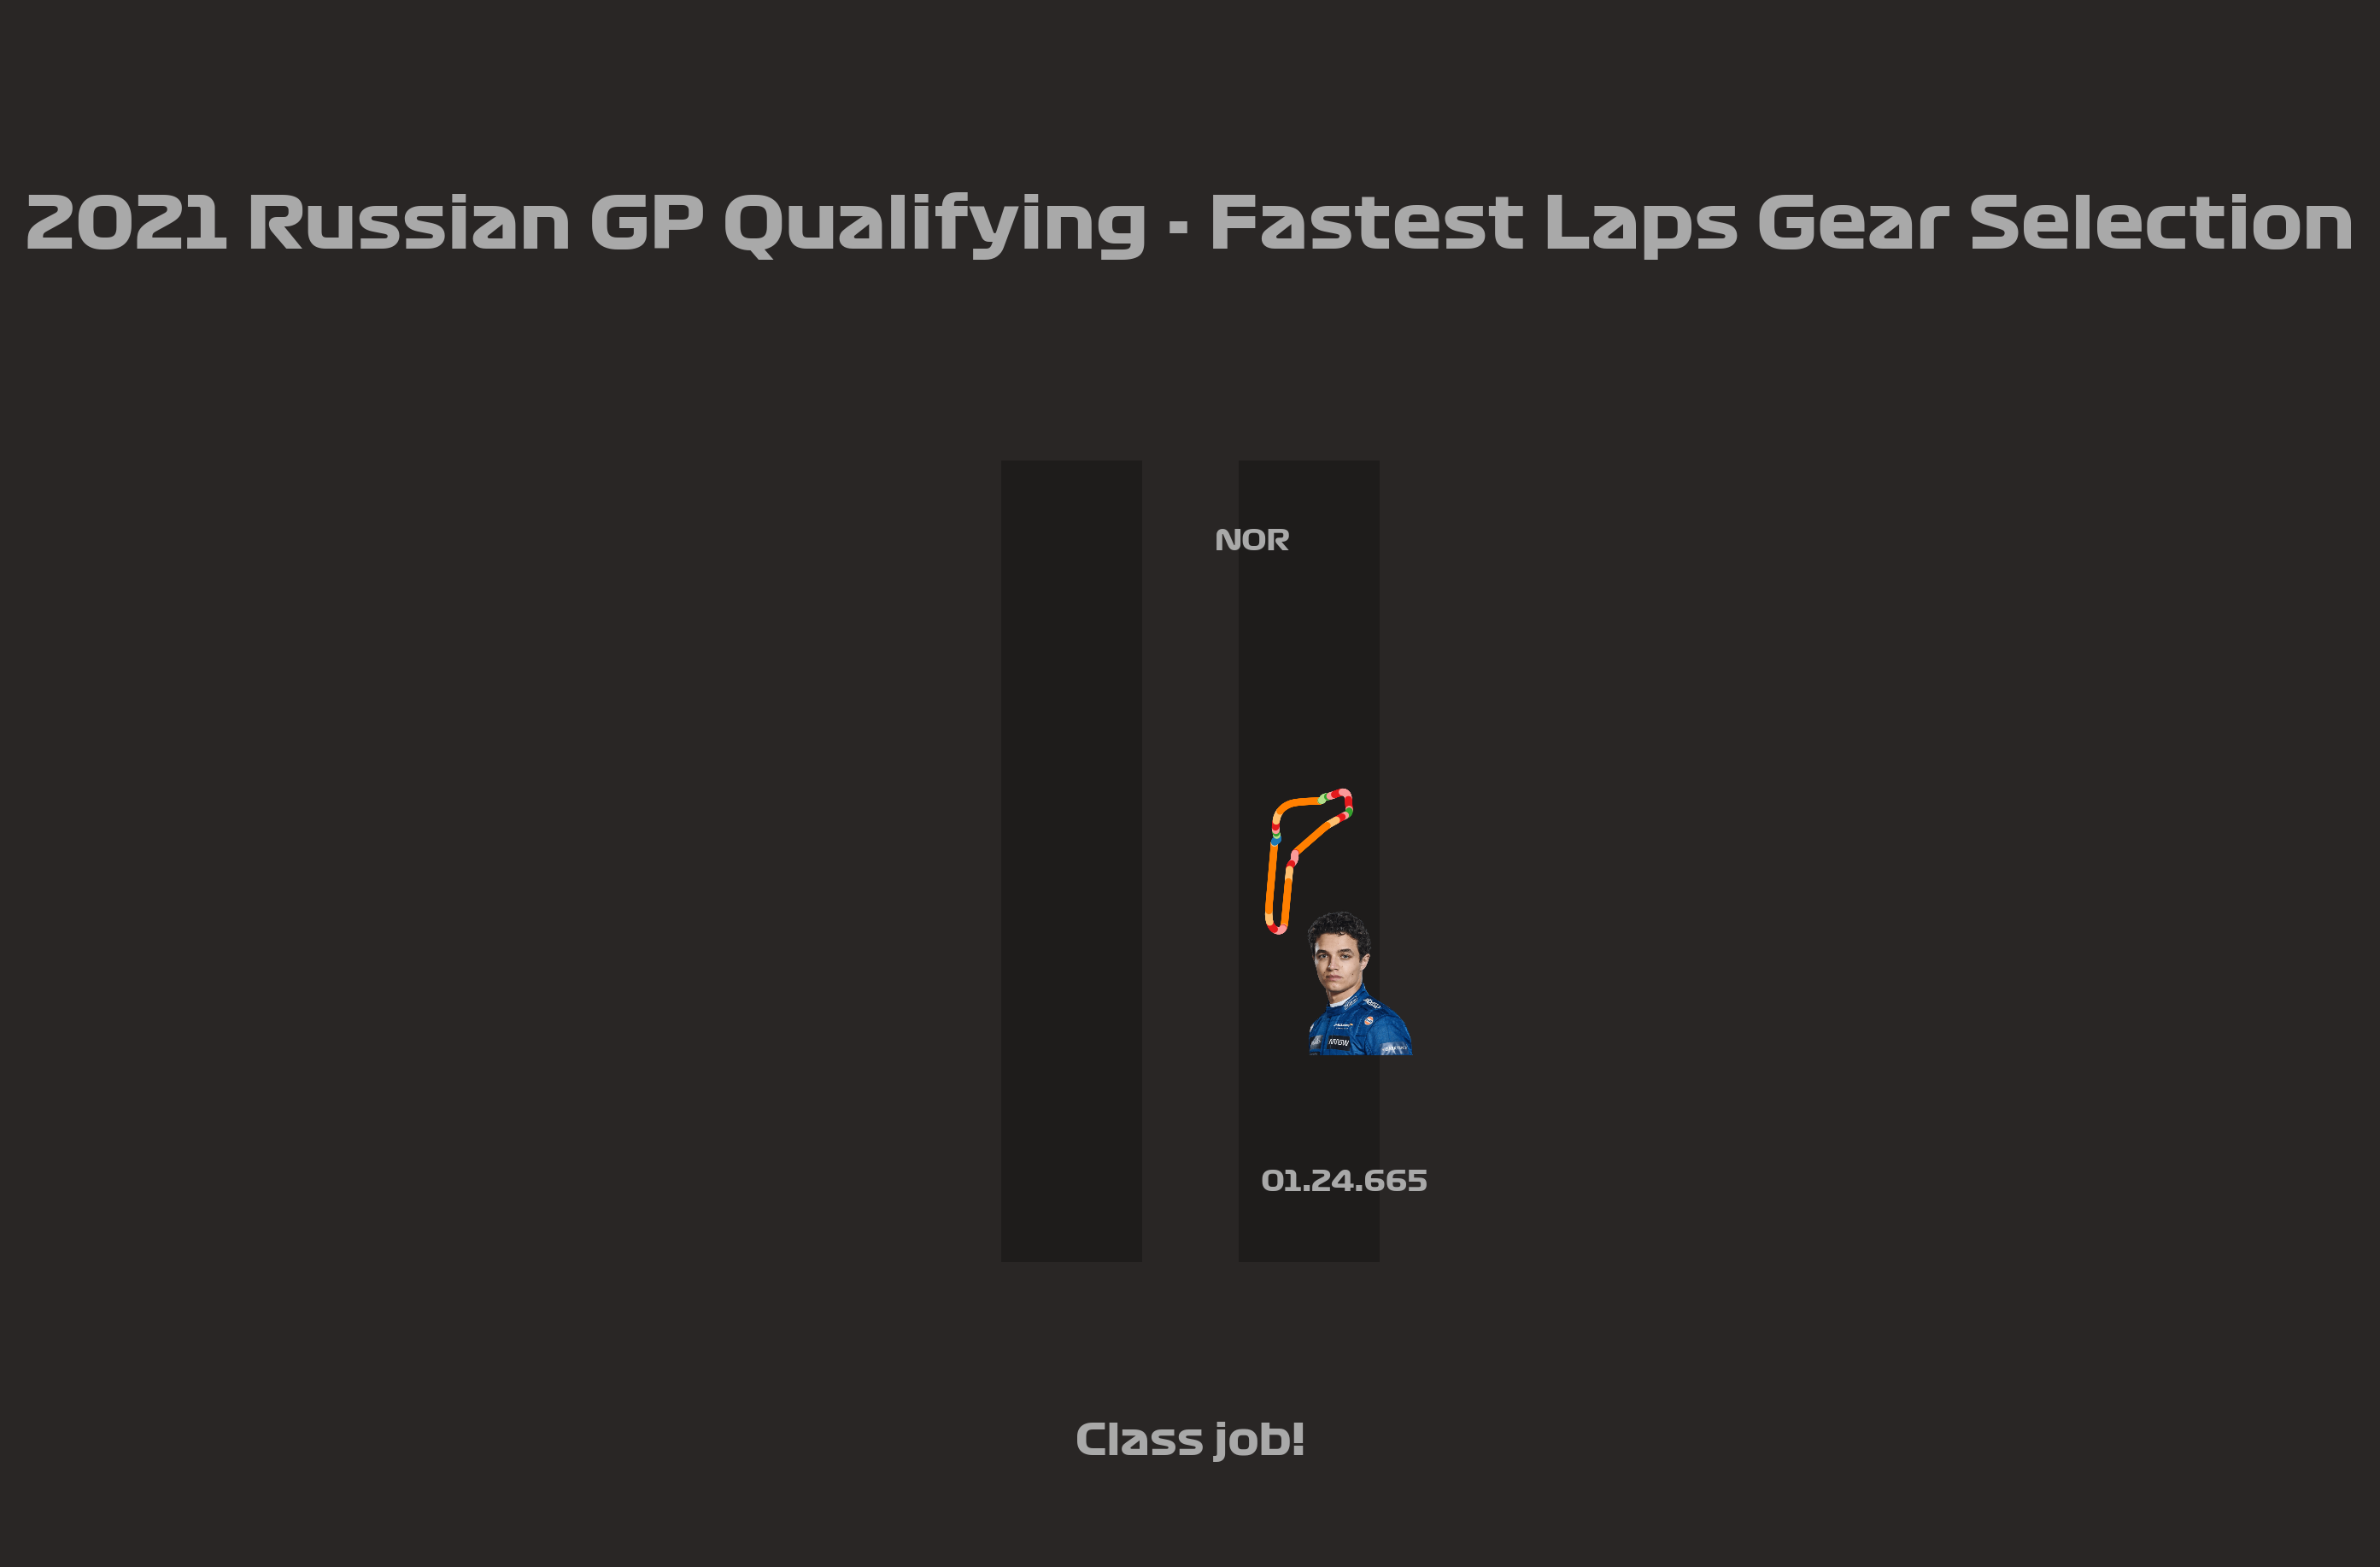

In [311]:
fig, axd = plt.subplot_mosaic(
    cells_laid_out, 
    dpi=300,
    constrained_layout=True,
    figsize=(6, 6),
    gridspec_kw=dict(
        height_ratios=[1] + list(np.repeat(2, rows)) + [0.5],
        width_ratios=[1,1]
    ))

for ax in axd.values():
    ax.tick_params(axis='both', colors='None')
axd['title'].axis('off')
axd['foot'].axis('off')

annotate_axes({'2021 Russian GP Qualifying - Fastest Laps Gear Selection': axd['title']}, kw_dict=dict(fontsize=20))
annotate_axes({'Class job!': axd['foot']}, kw_dict=dict(fontsize=12))

list_fastest_laps = list()
for drv in drivers:
    driver_row = dr_meta.loc[drv,]
    ax = axd[drv]
    
    lap = laps.pick_driver(drv).pick_fastest()
    try:
        tel = lap.get_telemetry()

        x = np.array(tel['X'].values)
        y = np.array(tel['Y'].values)

        points = np.array([x, y]).T.reshape(-1, 1, 2)
        segments = np.concatenate([points[:-1], points[1:]], axis=1)
        gear = tel['nGear'].to_numpy().astype(float)

        

        cmap = cm.get_cmap('Paired')
        lc_comp = LineCollection(
            segments, 
            norm=plt.Normalize(1, cmap.N+1), 
            cmap=cmap, 
            lw=2,
            antialiaseds=True)
        lc_comp.set_capstyle('round')
        lc_comp.set_joinstyle('round')
        lc_comp.set_array(gear)
        ax.add_collection(lc_comp)
        ax.axis('equal')
        comp = lap.LapTime.components

        ax.tick_params(labelleft=False, left=False, labelbottom=False, bottom=False)
        
        
        
                  
    except ValueError:
        print(f"Cannot get telemmetry for {drv}")
    annotate_axes({f"{comp.minutes:02}:{comp.seconds:02}:{comp.milliseconds:02}": ax},x=0.75, y=0.1)
    annotate_axes({f"{lap.Driver}": ax},x=0.1, y=0.9)
    add_image(ax, f"images/{driver_row['first_name'].lower()}_{driver_row['second_name'].lower()}_image.png")
              
cbar = plt.colorbar(mappable=lc_comp, label="Gear", boundaries=np.arange(1, 10), ax=axd['foot'], orientation="horizontal")
cbar.set_ticks(np.arange(1.5, 9.5))
cbar.set_ticklabels(np.arange(1, 9))


In [44]:
fig.savefig("fastest_laps.png", bbox_inches="tight")

In [232]:
list_fastest_laps = list()
for drv in drivers:
    drvs_fastest_lap = laps.pick_driver(drv).pick_fastest()
    list_fastest_laps.append(drvs_fastest_lap)
fastest_laps = Laps(list_fastest_laps).sort_values(by='LapTime').reset_index(drop=True)

In [11]:
import matplotlib.font_manager
from matplotlib import rcParams
matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')

['/System/Library/Fonts/Avenir Next.ttc',
 '/System/Library/Fonts/Supplemental/Copperplate.ttc',
 '/System/Library/Fonts/ヒラギノ丸ゴ ProN W4.ttc',
 '/System/Library/Fonts/SFNSTextCondensed-Bold.otf',
 '/System/Library/Fonts/MarkerFelt.ttc',
 '/System/Library/Fonts/Supplemental/Herculanum.ttf',
 '/System/Library/Fonts/Supplemental/PTMono.ttc',
 '/System/Library/Fonts/Supplemental/Athelas.ttc',
 '/Users/martin/Library/Fonts/FiraCode-Retina.ttf',
 '/System/Library/Fonts/SFNSTextCondensed-Medium.otf',
 '/System/Library/Fonts/Supplemental/DecoTypeNaskh.ttc',
 '/System/Library/Fonts/ヒラギノ角ゴシック W0.ttc',
 '/System/Library/Fonts/Supplemental/Oriya Sangam MN.ttc',
 '/System/Library/Fonts/Symbol.ttf',
 '/Users/martin/Library/Fonts/MesloLGS NF Regular.ttf',
 '/System/Library/Fonts/Supplemental/NotoSansCoptic-Regular.ttf',
 '/System/Library/Fonts/Supplemental/Bradley Hand Bold.ttf',
 '/System/Library/Fonts/Supplemental/STIXIntUpDReg.otf',
 '/System/Library/Fonts/Supplemental/STIXIntUpSmBol.otf',
 '/S

In [616]:
# Add every font at the specified location
font_dir = ['/Users/martin/Library/Fonts']
for font in matplotlib.font_manager.findSystemFonts(font_dir):
    matplotlib.font_manager.fontManager.addfont(font)

# Set font family globally

plt.style.use("seaborn-dark")
rcParams['font.family'] = 'Formula1-Regular'
rcParams["font.weight"] = "normal"
for param in ['figure.facecolor', 'axes.facecolor', 'savefig.facecolor']:
    rcParams[param] = '#212946'  # bluish dark grey
for param in ['text.color', 'axes.labelcolor', 'xtick.color', 'ytick.color']:
    rcParams[param] = '0.9'  # very light grey
ax.grid(color='#2A3459')  # bluish dark grey, but slightly lighter than background

In [615]:
rcParams

RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': True,
          'axes.edgecolor': 'white',
          'axes.facecolor': '#212946',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.f